In [1]:
from keras import layers
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Input,Dropout, BatchNormalization, Dense, Conv2D, MaxPool2D, AveragePooling2D, Flatten,MaxPooling2D, Activation, GlobalMaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.utils import to_categorical
from keras.models import Model
from keras.preprocessing import image
import keras.backend as K
from keras.utils import layer_utils
from keras.utils.data_utils import get_file

import matplotlib.pyplot as plt
import numpy as np

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Convert the Targets to Categorical values
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Reshape Training and Test Datasets
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Build The Model
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), input_shape=(28, 28, 1), padding="same"))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(5, 5), padding="same"))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(120, kernel_size=(5, 5)))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(84))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))


#####################################
#     MEMRISTOR WEIGHTS MODEL       #
#####################################
#weights = np.load(weight_file)
#model.set_weights(weights)

model.compile(loss='categorical_crossentropy',optimizer='adadelta', metrics=['accuracy'])

#####################################
#           MODEL SUMMARY           #
#####################################
print(model.summary())


c:\program files\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        2416      
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 120)         48120     
__________

In [19]:
h=model.fit(X_train, y_train_cat, batch_size=128, epochs=15, verbose=1,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 78s 2ms/step - loss: 1.1071 - acc: 0.8305 - val_loss: 0.1294 - val_acc: 0.9626
Epoch 2/15
48000/48000 [==============================] - 82s 2ms/step - loss: 0.1532 - acc: 0.9587 - val_loss: 0.0677 - val_acc: 0.9824
Epoch 3/15
48000/48000 [==============================] - 97s 2ms/step - loss: 0.1026 - acc: 0.9721 - val_loss: 0.0585 - val_acc: 0.9838
Epoch 4/15
48000/48000 [==============================] - 82s 2ms/step - loss: 0.0817 - acc: 0.9772 - val_loss: 0.0547 - val_acc: 0.9857
Epoch 5/15
48000/48000 [==============================] - 80s 2ms/step - loss: 0.0662 - acc: 0.9824 - val_loss: 0.0563 - val_acc: 0.9845
Epoch 6/15
48000/48000 [==============================] - 77s 2ms/step - loss: 0.0549 - acc: 0.9845 - val_loss: 0.0576 - val_acc: 0.9862
Epoch 7/15
48000/48000 [==============================] - 87s 2ms/step - loss: 0.0485 - acc: 0.9863 - val_loss: 0.0584 - val_acc

In [25]:
# Test Model Accuracy
Accuracy = model.evaluate(X_test, y_test_cat)
Accuracy

10000/10000 [==============================] - 4s 444us/step


[0.047384214390844594, 0.9894]

In [ ]:
h=model.fit(X_train, y_train_cat, batch_size=128, epochs=15, verbose=1,validation_split=0.2, )

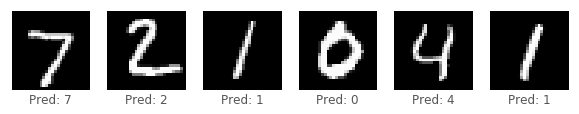

In [21]:
# Visualize Results
res = model.predict_classes(X_test[:6])
plt.style.use('ggplot')
plt.figure(figsize=(10, 10))

for i in range(6):
    plt.subplot(1, 6, i+1)
    plt.imshow(X_test[i, :,:].reshape((28,28)), cmap='gray')
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.xlabel('Pred: %d' % res[i])
plt.show()

Text(0.5,0,'Epochs')

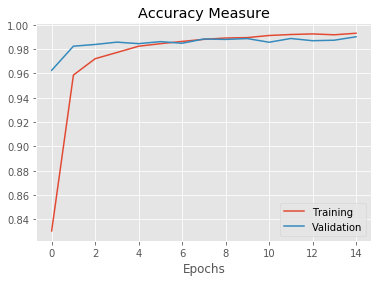

In [22]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy Measure')
plt.xlabel('Epochs')

Text(0.5,0,'Epochs')

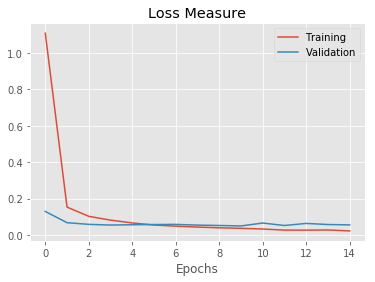

In [23]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Loss Measure')
plt.xlabel('Epochs')

In [24]:
# filename='weights_LeNET_npy.npy'
# np.save(filename, model.get_weights())